In [1]:
# 1. Import libraries
%pip install tensorflow scipy
import os
import sys
sys.path.append('../src')
from preprocessing import create_generators
from model import create_model
import tensorflow as tf


# 2. Paths
train_dir = '../data/train'
val_dir = '../data/validation'
test_dir = '../data/test'


# 3. Create generators
train_gen, val_gen, test_gen = create_generators(train_dir, val_dir, test_dir)


# 4. Create model
num_classes = len(train_gen.class_indices)
model = create_model(num_classes)


# 5. Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)


# 6. Save model
model.save('../models/classifier_model.h5')


# 7. Evaluate on test data
test_loss, test_acc = model.evaluate(test_gen)
print('Test Accuracy:', test_acc)

You should consider upgrading via the '/Users/sid/Documents/ALU/Summative_MLOP/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/sid/Documents/ALU/Summative_MLOP/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 3118 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Epoch 1/10
 6/98 [>.............................] - ETA: 1:20 - loss: 3.6389 - accuracy: 0.0521

/Users/sid/Documents/ALU/Summative_MLOP/venv/lib/python3.9/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 89s 897ms/step - loss: 1.6566 - accuracy: 0.5590 - val_loss: 0.4797 - val_accuracy: 0.8519
Epoch 2/10
98/98 [==============================] - 87s 886ms/step - loss: 0.6642 - accuracy: 0.7931 - val_loss: 0.3529 - val_accuracy: 0.9003
Epoch 3/10
98/98 [==============================] - 87s 887ms/step - loss: 0.4738 - accuracy: 0.8477 - val_loss: 0.2859 - val_accuracy: 0.9231
Epoch 4/10
98/98 [==============================] - 87s 884ms/step - loss: 0.3866 - accuracy: 0.8733 - val_loss: 0.2602 - val_accuracy: 0.9231
Epoch 5/10
98/98 [==============================] - 87s 888ms/step - loss: 0.3000 - accuracy: 0.9038 - val_loss: 0.2351 - val_accuracy: 0.9402
Epoch 6/10
98/98 [==============================] - 89s 905ms/step - loss: 0.2595 - accuracy: 0.9128 - val_loss: 0.2307 - val_accuracy: 0.9402
Epoch 7/10
98/98 [==============================] - 88s 902ms/step - loss: 0.2239 - accuracy: 0.9262 - val_loss: 0.2138 - val_accuracy: 0.9459
Epoch 8/10

/Users/sid/Documents/ALU/Summative_MLOP/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 10s 826ms/step - loss: 0.1952 - accuracy: 0.9471
Test Accuracy: 0.9470751881599426


In [2]:
# evaluate using the existing test_gen
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


12/12 [==============================] - 9s 774ms/step - loss: 0.1952 - accuracy: 0.9471
Test Accuracy: 0.9470751881599426
Test Loss: 0.19518525898456573


In [3]:
# 8. Save the trained model
model.save('../models/classifier_model.keras')

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    print("Predicted:", predicted_class)


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load model (prefer .h5; fallback to .keras if needed)
model_path = "../models/classifier_model.h5"
try:
    model = tf.keras.models.load_model(model_path)
except Exception:
    model = tf.keras.models.load_model("../models/classifier_model.keras")
# IMPORTANT: use class names from the generator created earlier (train_gen)
try:
    class_names = list(train_gen.class_indices.keys())
except NameError:
    # If `train_gen` isn't in scope (cell run order), recreate generators so class names are available
    from preprocessing import create_generators
    train_dir = '../data/train'
    val_dir = '../data/validation'
    test_dir = '../data/test'
    train_gen, val_gen, test_gen = create_generators(train_dir, val_dir, test_dir)
    class_names = list(train_gen.class_indices.keys())


def predict_image(img_path):
    # Load image with the same target size used for training (224x224)
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert to array and normalize
    img_array = image.img_to_array(img) / 255.0

    # Expand dims to create batch of 1
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_index = int(np.argmax(predictions[0]))

    predicted_class = class_names[predicted_index]
    confidence = float(predictions[0][predicted_index])

    print("Predicted Class:", predicted_class)
    print("Confidence:", round(confidence * 100, 2), "%")
    return predicted_class, confidence


In [6]:
predict_image("../data/validation/apple/Image_10.jpg")

1/1 [==============================] - 0s 341ms/step
Predicted Class: apple
Confidence: 95.15 %


('apple', 0.9514760971069336)

You should consider upgrading via the '/Users/sid/Documents/ALU/Summative_MLOP/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


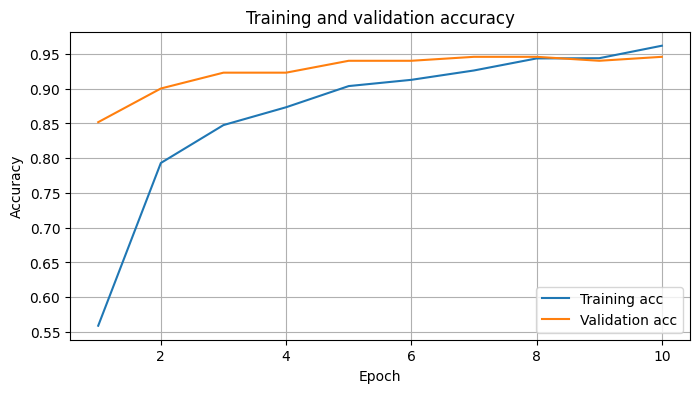

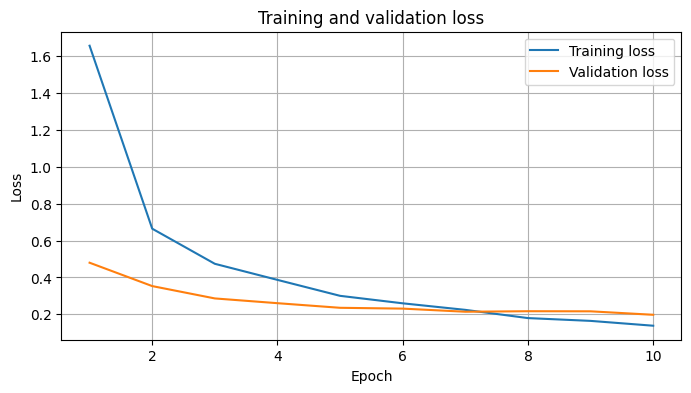

In [7]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# history comes from model.fit(...)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(8,4))
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8,4))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
plt.savefig('../models/training_accuracy.png', bbox_inches='tight')
plt.savefig('../models/training_loss.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

You should consider upgrading via the '/Users/sid/Documents/ALU/Summative_MLOP/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
12/12 [==============================] - 10s 774ms/step
               precision    recall  f1-score   support

        apple       1.00      0.80      0.89        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.83      1.00      0.91        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.80      0.80      0.80        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.83      1.00      0.91        10
         corn       0.75      0.60      0.67        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00    

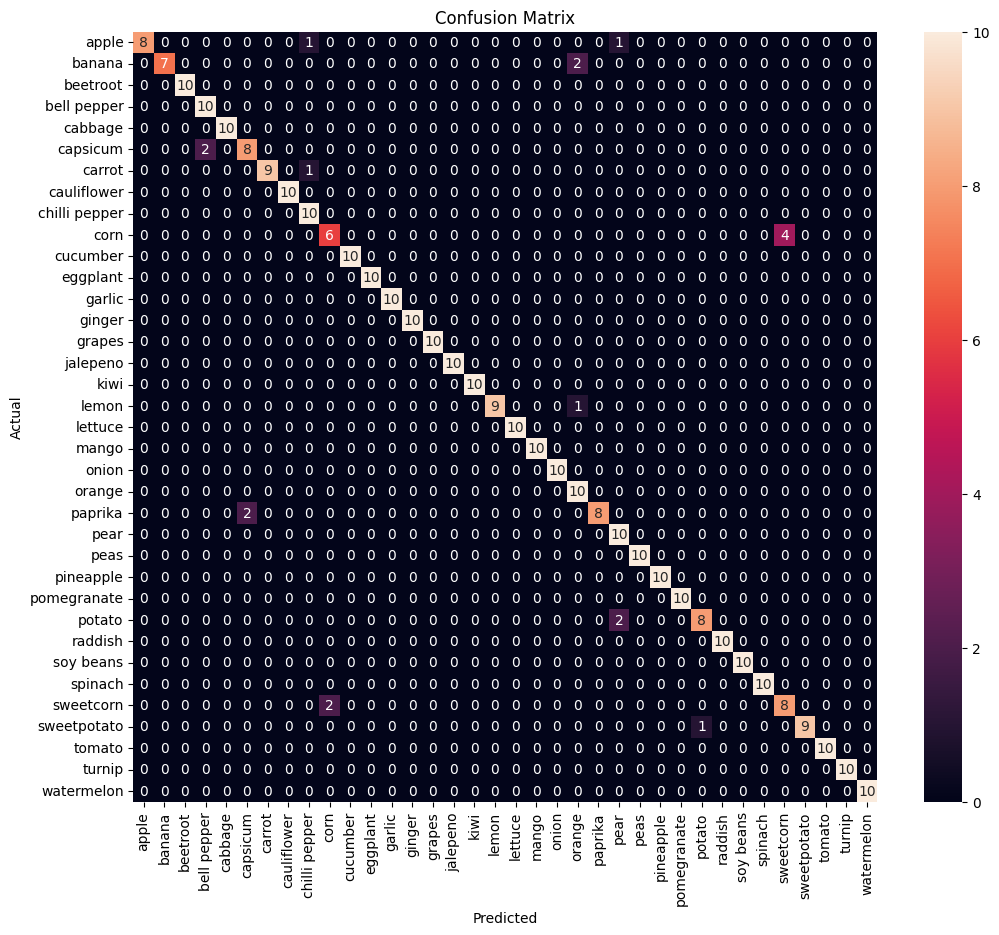

In [9]:
# 1) Get predictions on test generator
%pip install scikit-learn seaborn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# ensure test_gen is the generator used earlier (shuffle=False)
test_steps = test_gen.samples // test_gen.batch_size + int(test_gen.samples % test_gen.batch_size != 0)
pred_probs = model.predict(test_gen, steps=test_steps, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

# mapping class indices -> labels
class_indices = test_gen.class_indices
class_labels = {v:k for k,v in class_indices.items()}
labels = [class_labels[i] for i in range(len(class_labels))]

# 2) Metrics
print(classification_report(y_true, y_pred, target_names=labels))

# 3) Confusion matrix (display)
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save classification report to file
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
with open('../models/test_metrics.txt', 'w') as f:
    f.write(f'Accuracy: {acc}\\nPrecision: {prec}\\nRecall: {rec}\\nF1: {f1}\\n\\n')
    f.write(classification_report(y_true, y_pred, target_names=labels))


In [10]:
# Keras native format (.keras)
model.save('../models/classifier_model.keras')


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json

MODEL_PATH = '../models/classifier_model.keras'  # or .h5
CLASS_JSON = '../models/class_indices.json'

def load_model(model_path=MODEL_PATH):
    return tf.keras.models.load_model(model_path)

def predict_single(img_path, model, class_indices, target_size=(224,224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    idx = int(np.argmax(preds, axis=1)[0])
    inv_map = {v:k for k,v in class_indices.items()}
    label = inv_map[idx]
    return label, float(np.max(preds))

# Use the already available class_indices variable
model = load_model()
label, conf = predict_single('../data/validation/apple/Image_10.jpg', model, class_indices)
print('Predicted:', label, 'confidence:', conf)


1/1 [==============================] - 0s 325ms/step
Predicted: apple confidence: 0.9514760971069336


In [12]:
import json

with open(CLASS_JSON, "w") as f:
    json.dump(class_indices, f)

print("Saved class_indices.json")


Saved class_indices.json
